# 导入所需要的包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取和预处理所需要的的数据

In [2]:
df=pd.read_csv("watermelon.csv")
m,n=df.shape

In [3]:
df#查看读取的数据

,NO,色泽,根蒂,敲声,纹理,脐部,触感,midu,tang,nice
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,1
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,1
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,1
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,1
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,1
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,1
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,1
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,1
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,0
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,0


In [4]:
m,n#数据的形状为17*10

(17, 10)

In [5]:
#将数据转化为矩阵形式
dataMat=np.array(df[['NO','midu','tang']].values[:,1:])
dataMat

array([[0.697, 0.46 ],
       [0.774, 0.376],
       [0.634, 0.264],
       [0.608, 0.318],
       [0.556, 0.215],
       [0.403, 0.237],
       [0.481, 0.149],
       [0.437, 0.211],
       [0.666, 0.091],
       [0.243, 0.267],
       [0.245, 0.057],
       [0.343, 0.099],
       [0.639, 0.161],
       [0.657, 0.198],
       [0.36 , 0.37 ],
       [0.593, 0.042],
       [0.719, 0.103]])

In [6]:
# 将nice列转化为矩阵，并将其转置成为列矩阵
labelMat=np.mat(df['nice'].values[:]).transpose() 
labelMat

matrix([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=int64)

In [7]:
# 创建个w矩阵和同阶
w=np.array(np.ones(shape=(len(dataMat[1]),1))) # 各个属性的系数矩阵
w

array([[1.],
       [1.]])

# 迭代运算

In [8]:
#对w的修正
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
#
b = 0
stu_rate=0.1
max_count=100
#进行迭代运算
for k in range(max_count):
    for i in range(m):
        x=np.dot(dataMat[i],w)+b
        y=sigmoid(x)
        lost = labelMat[i]-y
        w=w+stu_rate*lost[0,0]*(dataMat[i].reshape(2,1))
w

array([[-1.13488892],
       [ 3.01574572]])

# 数据可视化

In [9]:
m=np.shape(dataMat)[0] #获得总共有多少数据点
m

17

In [10]:
#cord1 记录nice 标签的点
xcord1=[]
ycord1=[]
#cord2 记录不nice 标签的点
xcord2=[]
ycord2=[]

In [11]:
#将nice的点和不nice的点分别写入到记录坐标的列表里面去
for i in range(m):
    if labelMat[i]==1:
        xcord1.append(dataMat[i,0])
        ycord1.append(dataMat[i,1])
    else:
        xcord2.append(dataMat[i,0])
        ycord2.append(dataMat[i,1])

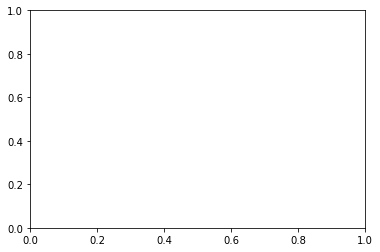

In [12]:
#建立画布和坐标系
plt.figure(1)
ax=plt.subplot(111)

In [13]:
# scatter 保存散点
ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
ax.scatter(xcord2,ycord2,s=30,c='green',marker='o')

In [14]:
#保存x，y坐标
x=np.arange(0.0,1.0,0.1)
y=np.array((-w[0]*x)/w[1])#为什么要这么设计？

Text(3.200000000000003, 0.5, 'tang')

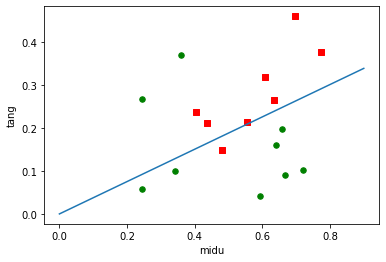

In [15]:
plt.sca(ax)
plt.plot(x,y)      
plt.xlabel('midu')
plt.ylabel('tang')